In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Exercise - 1

## 1.1 Read and display the image

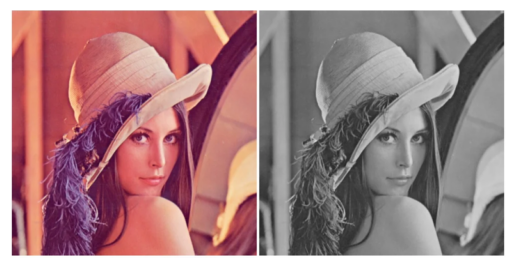

In [6]:
img_path = '/content/lenna_image.png'
img = Image.open(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

## 1.2 Display only the top left corner of 100x100 pixels

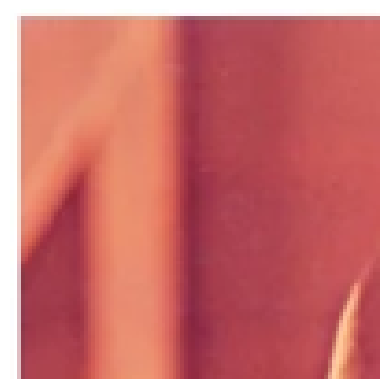

In [7]:
img_array = np.array(img)

top_left = img_array[:100, :100]

plt.imshow(top_left)
plt.axis('off')
plt.show()

## 1.3 Show the three color channels (R, G, B)

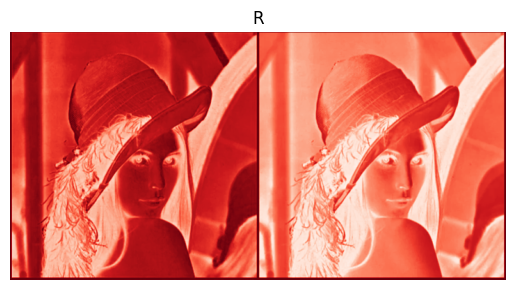

In [8]:
R = img_array[:, :, 0]

plt.imshow(R, cmap='Reds')

plt.title('R')
plt.axis('off')
plt.show()

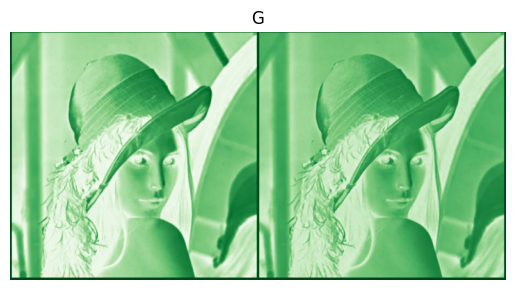

In [9]:
G = img_array[:, :, 1]

plt.imshow(G, cmap='Greens')

plt.title('G')
plt.axis('off')
plt.show()

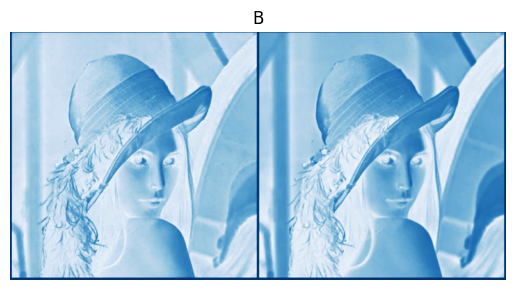

In [10]:
B = img_array[:, :, 2]

plt.imshow(B, cmap='Blues')

plt.title('B')
plt.axis('off')
plt.show()

## 1.4 Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

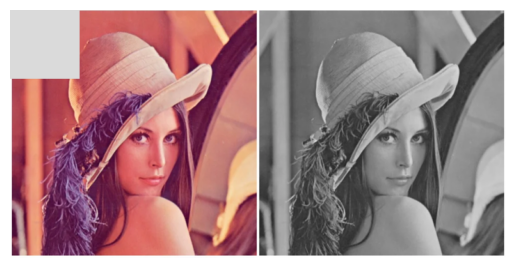

In [11]:
img_modified = img_array.copy()

img_modified[:100, :100] = 210

plt.imshow(img_modified)
plt.axis('off')
plt.show()

# Exercise - 2

## 2.1 Load and display a grayscale image

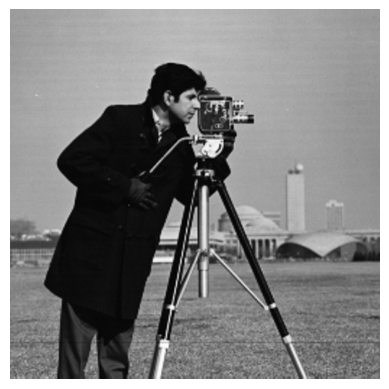

In [12]:
gray_img_path = '/content/cameraman.png'
img_gray = Image.open(gray_img_path).convert('L')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

## 2.2 Extract and display the middle section of the image

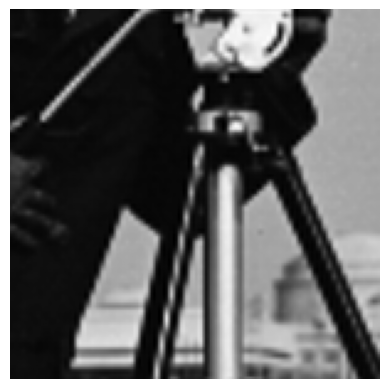

In [13]:
img_array_gray = np.array(img_gray)

h, w = img_array_gray.shape
center_y, center_x = h // 2, w // 2

cropped = img_array_gray[center_y-75:center_y+75, center_x-75:center_x+75]

plt.imshow(cropped, cmap='gray')
plt.axis('off')
plt.show()

## 2.3 Apply a threshold: set pixels below 100 to 0, above 100 to 255

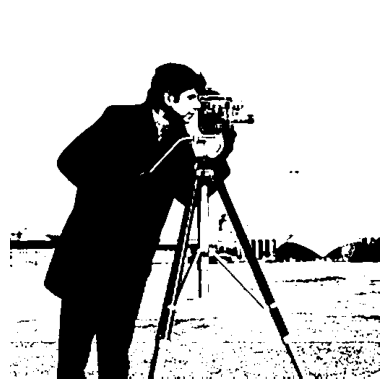

In [14]:
binary = np.where(img_array_gray < 100, 0, 255)

plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.show()

## 2.4 Rotate the image 90 degrees clockwise and display the result

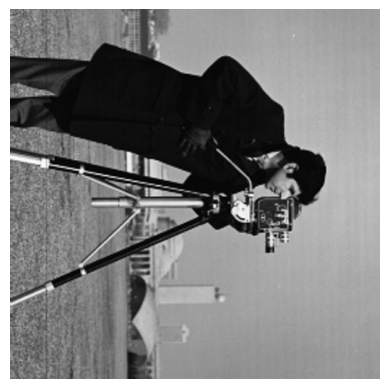

In [15]:
rotated = img_gray.transpose(Image.ROTATE_270)
plt.imshow(rotated, cmap='gray')
plt.axis('off')
plt.show()

## 2.5 Convert the grayscale image to an RGB image

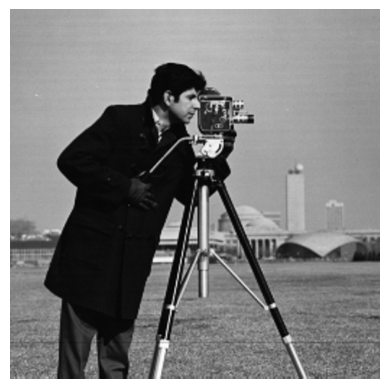

In [16]:
img_rgb = img_gray.convert('RGB')
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Exercise 3 Image Compression and Decompression using PCA

## 3.1 Load and Prepare Data

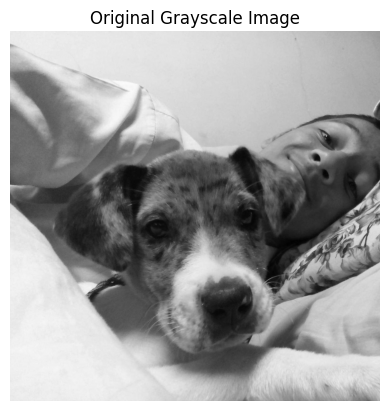

In [17]:
img_path = '/content/IMG_0127(1).jpg'
img = Image.open(img_path).convert('L')
image_array = np.array(img)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')
plt.show()

In [18]:
# Center the dataset - Standaridze the Data
height, width = image_array.shape
data = image_array.reshape(height, width)
mean = np.mean(data, axis=0)
centered_data = data - mean

In [19]:
# Calculate the covaraince matrix of the Standaridze data
cov_matrix = np.cov(centered_data, rowvar=False)

## 3.2 Eigen Decomposition and Identifying Principal Components

In [20]:
# Compute Eigen Values and Eigen Vectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

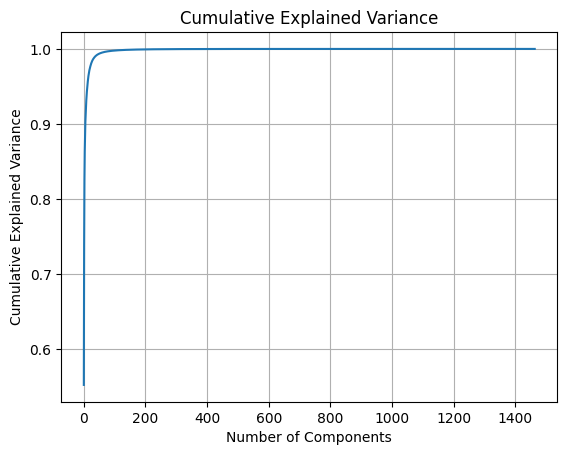

In [21]:
# Identify the Principal Components with the help of cumulative Sum plot
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## 3.3 Reconstruction and Experiment

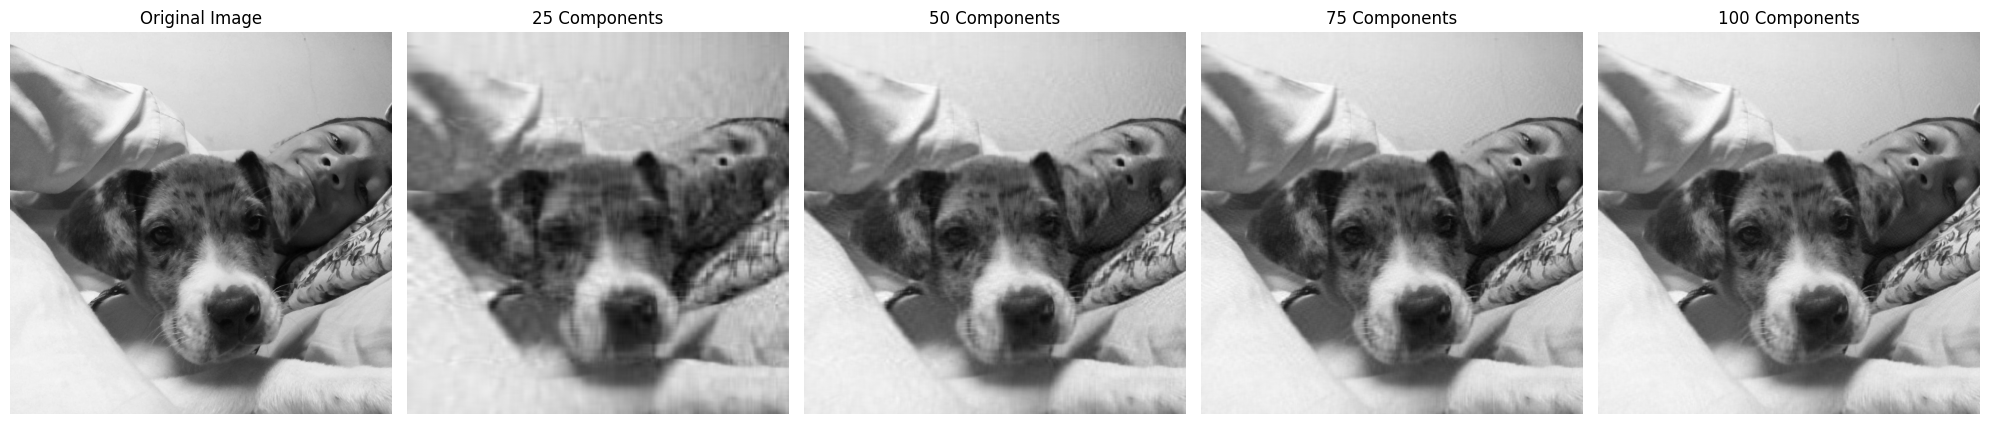

In [22]:
## Reconstruction: Transform the original data by multiplying it with the selected eigenvectors(PCs) to obtain a lower-dimensional representation.
k_values = [25, 50, 75, 100]

fig, axs = plt.subplots(1, len(k_values) + 1, figsize=(20, 5))
axs[0].imshow(image_array, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

for i, k in enumerate(k_values):
    components = eigenvectors[:, :k]
    compressed_data = np.dot(centered_data, components)
    decompressed_data = np.dot(compressed_data, components.T) + mean
    axs[i+1].imshow(decompressed_data, cmap='gray')
    axs[i+1].set_title(f'{k} Components')
    axs[i+1].axis('off')

plt.tight_layout()
plt.show()